# Ejemplo de red neuronal utilizando Python y el modulo Tensorflow
Para crear la red neuronal necesitamos tambien el API "Keras" que viene instalado en la paqueteria de Tensorflow.
Comenzamos importando las paqueterias necesarias, asi como el magic de matplotlib que necesitamos para poder imprimir plots.

In [11]:
%matplotlib inline

In [12]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

from random import randint
import numpy as np
import matplotlib.pyplot as plt

Una vez importadas las paqueterias, vamos a necesitar obtener de las bases de ejemplo de Keras, "fashion_mnist".
También necesitaremos dividir nuestros datos en el train set y test set.

In [13]:
ds = keras.datasets.fashion_mnist

#Dividimos en train y test set
(train_imgs, train_labls), (test_imgs, test_labls) = ds.load_data()

#Estos son los nombres de las respectivas labels, pues el array es de numeros de 0 a 9
nombres = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Vamos a visualizar rapidamente que es con lo que estamos alimentando a nuestro modelo.

Las dimensiones de las imagenes son: 
(60000, 28, 28)


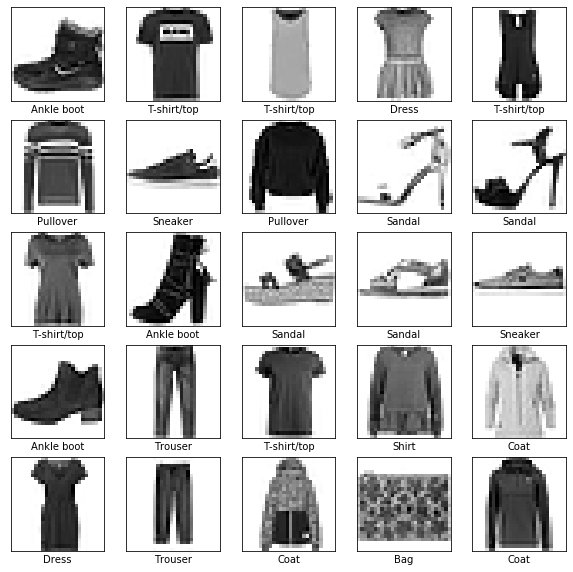

In [14]:
print('Las dimensiones de las imagenes son: ')
print(train_imgs.shape)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_imgs[i], cmap=plt.cm.binary)
    plt.xlabel(nombres[train_labls[i]])
plt.show()

Vemos que vamos a entrenar nuestro modelo con imagenes hechas con matrices de 28 x 28, con un total de 6000 imagenes.

# Creacion del modelo.

In [15]:
#Convertimos las imagenes en porcentajes para que sea mas facil para tensorflow manejarlos
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.00

#Aqui se crean los niveles de la red neuronal
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #Primer capa, inputs; 28*28 por que las imagenes son de ese tamaño
    keras.layers.Dense(128,activation="relu"), #Hacemos una capa de 128 neuronas todas unidas entre si, relu es rectified linear unit
    keras.layers.Dense(10, activation="softmax") #Neuronas output, 10 porque tenemos 10 posibles resultados, softmax le asigna una probabilidad de que sea la respuesta correcta a cada una
    ])

modelo.compile(optimizer='adam',                       #Parametros para el modelo y compilación
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


modelo.fit(train_imgs, train_labls, epochs=5) #aqui entrenamos el modelo, epochs son las veces que lo vas a entrenar se seleccionan las imagenes de prueba aleatoriamente para que sean distintas muestras 

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 131us/sample - loss: 0.4988 - acc: 0.8248
Epoch 2/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.3782 - acc: 0.8651
Epoch 3/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.3385 - acc: 0.8763
Epoch 4/5
60000/60000 [==============================] - 7s 122us/sample - loss: 0.3145 - acc: 0.8840
Epoch 5/5
60000/60000 [==============================] - 7s 123us/sample - loss: 0.2945 - acc: 0.8930


Con nuestro modelo entrenado, lo utilizaremos con nuestro train set para comprobar que realmente funciona.

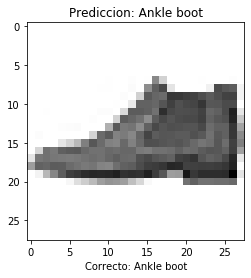

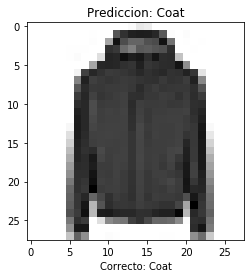

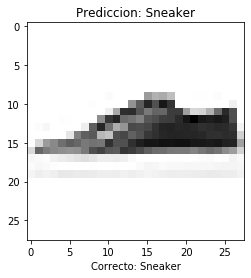

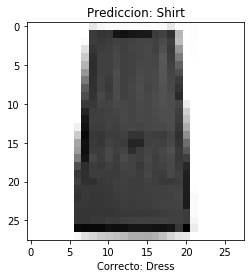

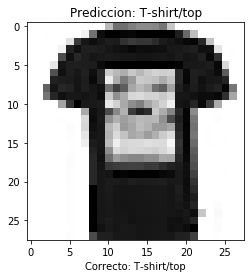

In [16]:
prediccion = modelo.predict(test_imgs)

#rdn = np.empty(5, dtype=int, order='C')
rdn = np.random.randint(500, size=5)
#for i in range(5):
#    rdn[i] = randint(0,500)
    
for i in rdn:
    plt.grid(False)
    plt.imshow(test_imgs[i], cmap=plt.cm.binary)
    plt.xlabel("Correcto: " + nombres[test_labls[i]]) #argmax agarra el maximo y obtiene la posisicion en el array en la que esta
    plt.title("Prediccion: " + nombres[np.argmax(prediccion[i])])
    plt.show()